# Lead Scoring Analysis for X Education

### Objective 

- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads.A higher score would mean that the lead is hot. The target lead conversion rate to be around 80%.
- There are some more problems presented by the company which model should be able to adjust to if the company's requirement changes in the future. 

### Steps in buiding the model 

1. Importing the data and understanding
2. Data Cleaning 
3. Missing Value Treatment
4. Outlier Treatment
5. Numerical Column Multicollinearity check
6. Categorical Variable Imputation
7. Dropping unnecessary columns
8. Creating Dummy Variables for Categorical Columns
9. Model Building
- Train and Test Split
- Feature Scaling
- Feature Selection from RFE
- Creating a Model
- Assessing model with statsmodel
- Checking VIF
- Performing Iterations
- Predicting on Training dataset
- Plotting ROC Curve
- Find Optimal Probability cut-off
- Finding Accuracy, Sensitivity and Specificity
- Making Predictions on Test dataset
- Evaluating the metrics for test dataset
10. Adding a Lead Score to data frame
Finding the final Equation


### Step1: Data Import and Understanding 

In [1]:
# Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import linear_model
import statsmodels.api as sm

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)

In [2]:
# Importing the dataset

Lead_df= pd.read_csv("Leads.csv")

Lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# Lets create copy of dataset

lead_original=Lead_df.copy()

In [4]:
# Understading the dataset and inspecting various aspects 

Lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
Lead_df.shape

(9240, 37)

In [6]:
# Get the aggregate value like, count, size and No of different values for each column
Lead_df.agg(['count','size','nunique'])

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240,9240,9204,9240,9240,9240,9103,9240,9103,9137,6779,7802,7033,6550,6531,9240,9240,9240,9240,9240,9240,9240,9240,5887,4473,9240,9240,6531,7820,5022,5022,5022,5022,9240,9240,9240
size,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240
nunique,9240,9240,5,21,2,2,2,41,1731,114,17,38,19,10,6,3,2,1,2,2,2,2,2,1,26,5,1,1,6,7,3,3,12,10,1,2,16


In [7]:
# Before going further, lets drop the columns which seems not to be significant or have only 1 unique value
# We will keep Lead Number as unique identity for lead

Lead_df.drop(['Prospect ID',"Magazine",'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content','City', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',"I agree to pay the amount through cheque"],axis=1,inplace=True)

In [8]:
# verifying the shape of dataset 

Lead_df.shape

(9240, 28)

In [9]:
# There are lot of values in dataset as 'Select', lets replace it with nan. 

Lead_df = Lead_df.replace("Select",np.nan)

In [10]:
# Lets check the non null % in data set

Lead_df.isnull().sum()/len(Lead_df)

Lead Number                                      0.000000
Lead Origin                                      0.000000
Lead Source                                      0.003896
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      0.014827
Total Time Spent on Website                      0.000000
Page Views Per Visit                             0.014827
Last Activity                                    0.011147
Country                                          0.266342
Specialization                                   0.365801
How did you hear about X Education               0.784632
What is your current occupation                  0.291126
What matters most to you in choosing a course    0.293182
Search                                           0.000000
Newspaper Article                                0.000000
X Education Fo

In [11]:
#Rather than removing each column seperately, lets define a function which can remove columns with more than 40% null values. 

def missing_values(Lead_df, percentage):
    columns = Lead_df.columns
    percent_missing = Lead_df.isnull().sum() * 100 / len(Lead_df)
    missing_value_Lead_df = pd.DataFrame({'column_name': columns,
                                 'percent_missing': percent_missing})
    missing_drop = list(missing_value_Lead_df[missing_value_Lead_df.percent_missing > percentage].column_name)
    Lead_df = Lead_df.drop(missing_drop, axis=1)
    return Lead_df

In [12]:
#we will create new dataframe Lead_dropnull which hava all columns other than 40% null values

Lead_dropnull= missing_values(Lead_df, percentage= 40)
pd.set_option('display.max_columns',50)
Lead_dropnull.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,Interested in other courses,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,No,Modified


In [13]:
Lead_dropnull.shape

(9240, 23)

In [14]:
Lead_dropnull.isnull().sum()/len(Lead_dropnull)

Lead Number                                      0.000000
Lead Origin                                      0.000000
Lead Source                                      0.003896
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      0.014827
Total Time Spent on Website                      0.000000
Page Views Per Visit                             0.014827
Last Activity                                    0.011147
Country                                          0.266342
Specialization                                   0.365801
What is your current occupation                  0.291126
What matters most to you in choosing a course    0.293182
Search                                           0.000000
Newspaper Article                                0.000000
X Education Forums                               0.000000
Newspaper     

### Lets deal with binary response columns 

In [15]:
two_val_col=[]
for col in Lead_dropnull.columns:
    if len(Lead_dropnull[col].value_counts(dropna=False))==2:
        two_val_col.append(col)
two_val_col

['Do Not Email',
 'Do Not Call',
 'Converted',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'A free copy of Mastering The Interview']

In [16]:
for col in two_val_col:
    print(Lead_dropnull[col].value_counts(dropna=False),'\n')

No     8506
Yes     734
Name: Do Not Email, dtype: int64 

No     9238
Yes       2
Name: Do Not Call, dtype: int64 

0    5679
1    3561
Name: Converted, dtype: int64 

No     9226
Yes      14
Name: Search, dtype: int64 

No     9238
Yes       2
Name: Newspaper Article, dtype: int64 

No     9239
Yes       1
Name: X Education Forums, dtype: int64 

No     9239
Yes       1
Name: Newspaper, dtype: int64 

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64 

No     9233
Yes       7
Name: Through Recommendations, dtype: int64 

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64 



In [17]:
# We want to keep these columns as the imbalance does not seem so significant 
#'Converted','A free copy of Mastering The Interview','Do not Email'
# We will drop other columns from Lead_dropnull Dataset
Lead_dropnull.drop(['Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums','Newspaper', 
                    'Digital Advertisement', 'Through Recommendations'],axis=1,inplace=True)

In [18]:
# lets check for the shape of data frame 

Lead_dropnull.shape

(9240, 16)

In [19]:
#Lets describe the dataset

Lead_dropnull.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820
std,23405.995698,0.486714,4.854853,548.021466,2.161418
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000


### Lets deal with missing values of numerical columns

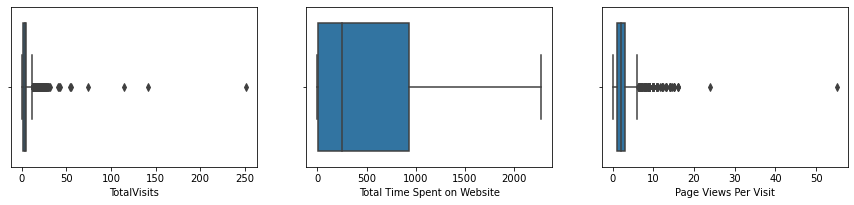

In [20]:
#plotting box plot for numerical columns to check outliers 

num_col= ['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']
plt.figure(figsize=(15,10))
for i in enumerate(num_col):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(x = i[1], data =Lead_dropnull)
plt.show()

In [21]:
# We can see there are many outliers for 'TotalVisits' and 'Page Views Per Visit' in upper range
# So lets Cap the outliers for these features till 0.99

cap_cols = ['TotalVisits', 'Page Views Per Visit']

for i, col in enumerate(cap_cols):
    q4 = Lead_dropnull[col].quantile(0.99)
    Lead_dropnull[col][Lead_dropnull[col]>=q4] = q4

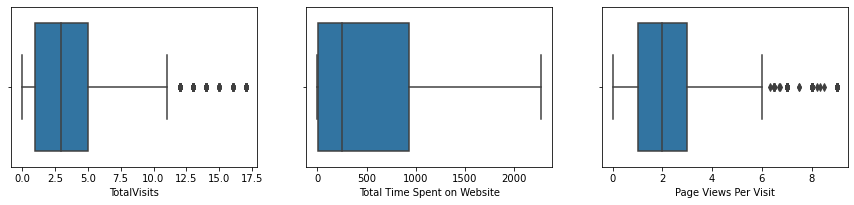

In [22]:
# Lets check if outliers has dropped from dataset

plt.figure(figsize=(15,10))
for i in enumerate(num_col):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(x = i[1], data =Lead_dropnull)
plt.show()

In [23]:
Lead_dropnull.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000
mean,617188.435606,0.385390,3.332747,487.698268,2.334002
std,23405.995698,0.486714,3.252420,548.021466,1.985712
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
max,660737.000000,1.000000,17.000000,2272.000000,9.000000


In [24]:
# Imputing missing values in TotalVisits and Page Views Per Visit equal to mean

Lead_dropnull.loc[Lead_dropnull['TotalVisits'].isnull(),'TotalVisits']=Lead_dropnull['TotalVisits'].mean()
Lead_dropnull.loc[Lead_dropnull['Page Views Per Visit'].isnull(),'Page Views Per Visit']=Lead_dropnull['Page Views Per Visit'].mean()

In [25]:
# Lets describe the data set to validate the changes 

Lead_dropnull.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,617188.435606,0.385390,3.332747,487.698268,2.334002
std,23405.995698,0.486714,3.228216,548.021466,1.970934
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
max,660737.000000,1.000000,17.000000,2272.000000,9.000000


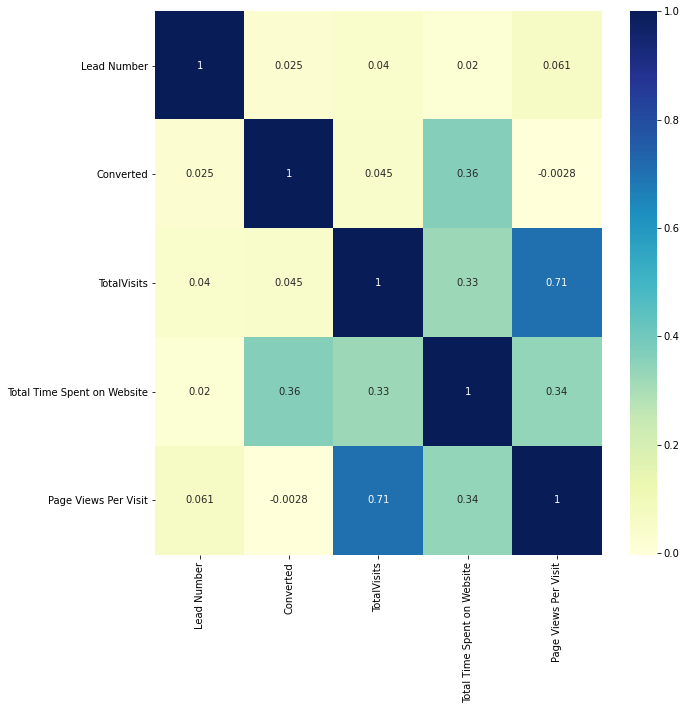

In [26]:
# lets plot heatmap to check for correlations between numerical variables

plt.figure(figsize = (10,10))        # Size of the figure
sns.heatmap(Lead_dropnull.corr(),cmap='YlGnBu', annot=True)
plt.show()

#### We can see there is high correlation between 'Total Visit' and 'Page Views Per Visit'. So lets drop any one of them to avoid multicollinearity. 

In [27]:
#Lets drop the column 'Page Views Per Visit' from lead_dropnull

Lead_dropnull.drop("Page Views Per Visit", inplace=True, axis=1)

In [28]:
#verfiying the size

Lead_dropnull.shape

(9240, 15)

## Lets explore Categorical variable

In [29]:
Lead_dropnull.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9240 non-null   int64  
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9204 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9240 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Last Activity                                  9137 non-null   object 
 8   Country                                        6779 non-null   object 
 9   Specialization                                 5860 

### Lead Source Column

In [30]:
# Checking for values in Lead Source column

Lead_dropnull["Lead Source"].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
NC_EDM                  1
WeLearn                 1
blog                    1
testone                 1
welearnblog_Home        1
Pay per Click Ads       1
Name: Lead Source, dtype: int64

In [31]:
# We can see Google and google so we will change and combine it 

Lead_dropnull['Lead Source'] = Lead_dropnull['Lead Source'].replace(['google'], 'Google')

#check for column 
Lead_dropnull["Lead Source"].value_counts(dropna=False)

Google               2873
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
NC_EDM                  1
WeLearn                 1
blog                    1
testone                 1
welearnblog_Home        1
Pay per Click Ads       1
Name: Lead Source, dtype: int64

In [32]:
# Put all the lead source haiving single digit count as Other 

ls_cnt = Lead_dropnull['Lead Source'].value_counts()
ls_lst = ls_cnt[ls_cnt < 10].index.tolist()
ls_lst

['bing',
 'Click2call',
 'Live Chat',
 'Press_Release',
 'Social Media',
 'WeLearn',
 'testone',
 'Pay per Click Ads',
 'NC_EDM',
 'youtubechannel',
 'blog',
 'welearnblog_Home']

In [33]:
# Lets replace ls_lst with Other

Lead_dropnull['Lead Source'] = Lead_dropnull['Lead Source'].replace(ls_lst, 'Others')

#check for column 
Lead_dropnull["Lead Source"].value_counts(dropna=False)

Google              2873
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Facebook              55
NaN                   36
Others                23
Name: Lead Source, dtype: int64

In [34]:
## Now lets impute null values with Mode values

Lead_dropnull.loc[(Lead_dropnull['Lead Source'].isnull()==True),  'Lead Source'] = Lead_dropnull['Lead Source'].mode()[0]

#Verifying the dataframe
Lead_dropnull['Lead Source'].value_counts()

Google              2909
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Facebook              55
Others                23
Name: Lead Source, dtype: int64

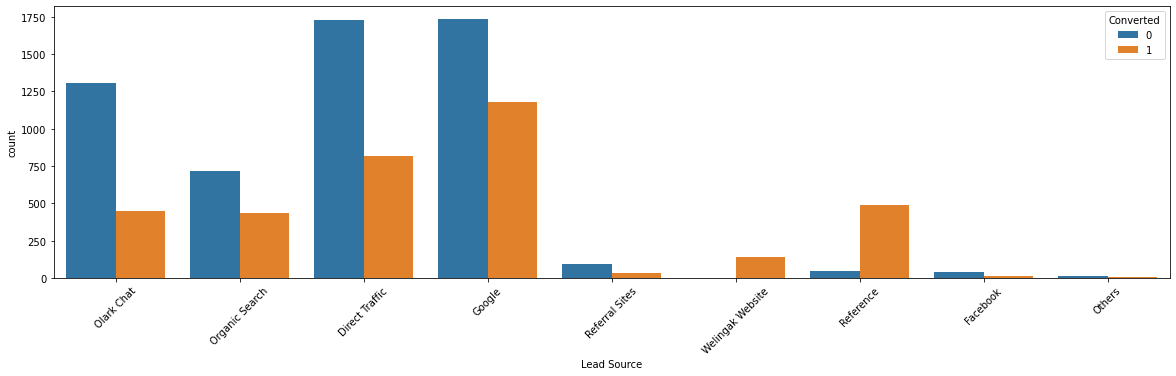

In [35]:
plt.figure(figsize=(20,5))
s = sns.countplot(x = "Lead Source", hue = "Converted", data = Lead_dropnull)
s.set_xticklabels(s.get_xticklabels(),rotation=45)
plt.show()

##### We can that if the lead source is Reference and Welingak Website then there is high chances of convertsion. 
#### Also Olark Chat Organic search, Direct Traffic, google, Refferal sites and facebook also have good conversion(less)

### Last Activity Column

In [36]:
Lead_dropnull["Last Activity"].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [37]:
# Put all the Last Activity haiving single digit count as Other 

ls_cnt1 = Lead_dropnull['Last Activity'].value_counts()
ls_lst1 = ls_cnt1[ls_cnt1 < 10].index.tolist()
ls_lst1

['Approached upfront',
 'View in browser link Clicked',
 'Email Received',
 'Email Marked Spam',
 'Visited Booth in Tradeshow',
 'Resubscribed to emails']

In [38]:
# Lets replace ls_lst1 with Other

Lead_dropnull['Last Activity'] = Lead_dropnull['Last Activity'].replace(ls_lst1, 'Others')

#check for column 
Lead_dropnull["Last Activity"].value_counts(dropna=False)

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
Form Submitted on Website     116
NaN                           103
Unreachable                    93
Unsubscribed                   61
Had a Phone Conversation       30
Others                         21
Name: Last Activity, dtype: int64

In [39]:
## Now lets impute null values with Mode values

Lead_dropnull.loc[(Lead_dropnull['Last Activity'].isnull()==True),  'Last Activity'] = Lead_dropnull['Last Activity'].mode()[0]

#Verifying the dataframe
Lead_dropnull['Last Activity'].value_counts()

Email Opened                 3540
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
Form Submitted on Website     116
Unreachable                    93
Unsubscribed                   61
Had a Phone Conversation       30
Others                         21
Name: Last Activity, dtype: int64

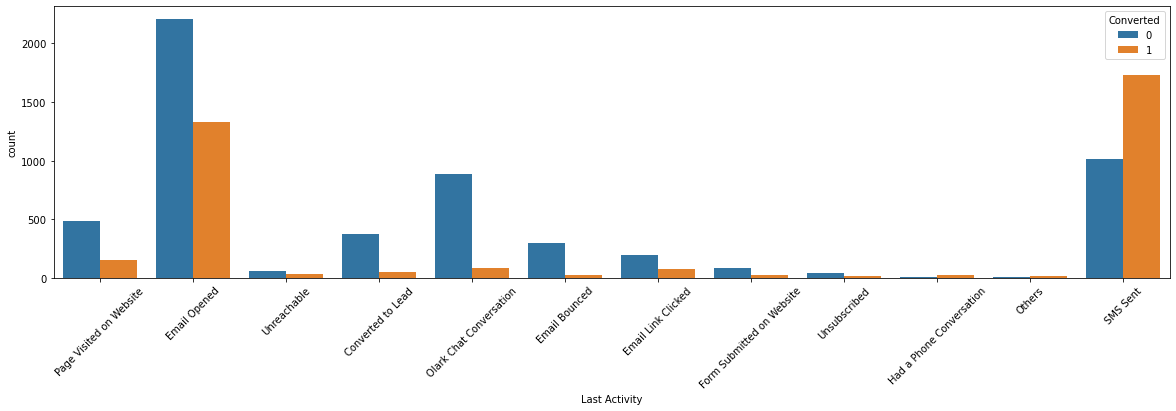

In [40]:
plt.figure(figsize=(20,5))
s = sns.countplot(x = "Last Activity", hue = "Converted", data = Lead_dropnull)
s.set_xticklabels(s.get_xticklabels(),rotation=45)
plt.show()

#### People who sent SMS have high chances of conversion
#### People who have opned the email also have good conversion rate. 

### Country Column

In [41]:
# Lets check for country column

Lead_dropnull["Country"].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
unknown                    5
South Africa               4
Nigeria                    4
Kuwait                     4
Germany                    4
Canada                     4
Sweden                     3
Ghana                      2
Netherlands                2
Italy                      2
Asia/Pacific Region        2
China                      2
Belgium                    2
Uganda                     2
Philippines                2
Bangladesh                 2
Switzerland                1
Denmark                    1
Liberia                    1
Indonesia                  1
Russia                     1
Tanzania      

In [42]:
# We can see there are 2461 countries unknown but we cant impute it with mode. We already have category as unknown
# So lets move these countries in unknown 

Lead_dropnull.loc[(Lead_dropnull['Country'].isnull()==True),  'Country'] = 'unknown'

#Verifying the dataframe
Lead_dropnull['Country'].value_counts()

India                   6492
unknown                 2466
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
Germany                    4
Canada                     4
South Africa               4
Kuwait                     4
Nigeria                    4
Sweden                     3
Philippines                2
Uganda                     2
Ghana                      2
China                      2
Belgium                    2
Netherlands                2
Asia/Pacific Region        2
Bangladesh                 2
Italy                      2
Sri Lanka                  1
Russia                     1
Kenya                      1
Liberia                    1
Denmark                    1
Indonesia                  1
Switzerland   

In [43]:
# Put all the Country haiving single digit count as Other 

ls_cnt2 = Lead_dropnull['Country'].value_counts()
ls_lst2 = ls_cnt2[ls_cnt2 < 10].index.tolist()
ls_lst2

['Bahrain',
 'Hong Kong',
 'Oman',
 'France',
 'Germany',
 'Canada',
 'South Africa',
 'Kuwait',
 'Nigeria',
 'Sweden',
 'Philippines',
 'Uganda',
 'Ghana',
 'China',
 'Belgium',
 'Netherlands',
 'Asia/Pacific Region',
 'Bangladesh',
 'Italy',
 'Sri Lanka',
 'Russia',
 'Kenya',
 'Liberia',
 'Denmark',
 'Indonesia',
 'Switzerland',
 'Tanzania',
 'Malaysia',
 'Vietnam']

In [44]:
# Lets replace ls_lst2 with Other Countries

Lead_dropnull['Country'] = Lead_dropnull['Country'].replace(ls_lst2, 'Other Countries')

#check for column 
Lead_dropnull["Country"].value_counts(dropna=False)

India                   6492
unknown                 2466
Other Countries           77
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Name: Country, dtype: int64

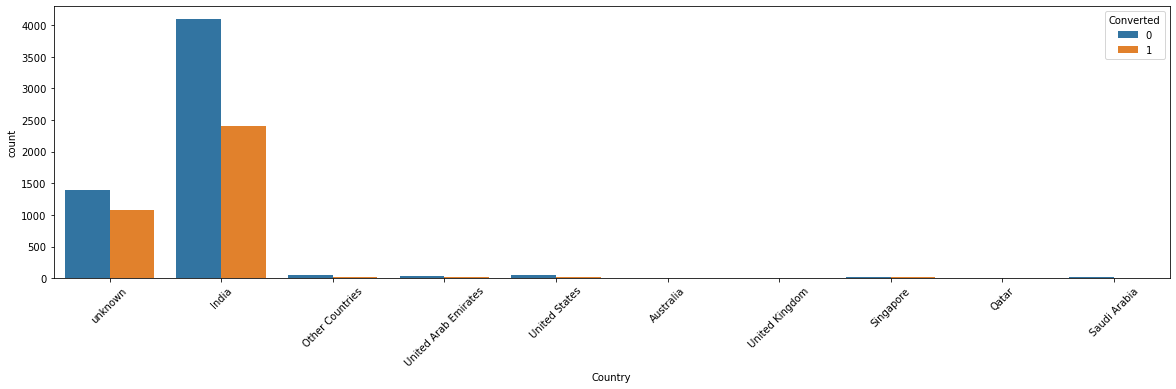

In [45]:
plt.figure(figsize=(20,5))
s = sns.countplot(x = "Country", hue = "Converted", data = Lead_dropnull)
s.set_xticklabels(s.get_xticklabels(),rotation=45)
plt.show()

#### We can see India and Unknown has higer coversion rate. 

### Specialization  Column 

In [46]:
Lead_dropnull["Specialization"].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [47]:
# Lets categories Nan as Unknown as % is more

Lead_dropnull.loc[(Lead_dropnull['Specialization'].isnull()==True),  'Specialization'] = 'Unknown Specialization'

#Verifying the dataframe
Lead_dropnull['Specialization'].value_counts()

Unknown Specialization               3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

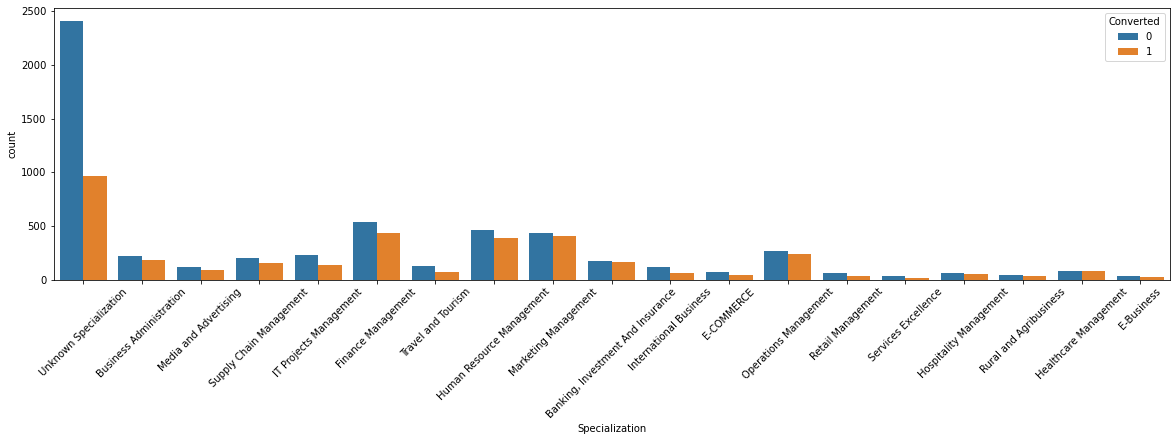

In [48]:
# Lets plot with target variable to understand 

plt.figure(figsize=(20,5))
s = sns.countplot(x = "Specialization", hue = "Converted", data = Lead_dropnull)
s.set_xticklabels(s.get_xticklabels(),rotation=45)
plt.show()

#### We can see that Most of specialization have higher conversation rate except unknown 

### What is your current occupation Column 

In [49]:
Lead_dropnull["What is your current occupation"].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [50]:
# We have large number with uknown profession so lets categories these as Other as it already exists 

Lead_dropnull.loc[(Lead_dropnull['What is your current occupation'].isnull()==True),  'What is your current occupation'] = 'Other'

#Verifying the dataframe
Lead_dropnull['What is your current occupation'].value_counts()

Unemployed              5600
Other                   2706
Working Professional     706
Student                  210
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

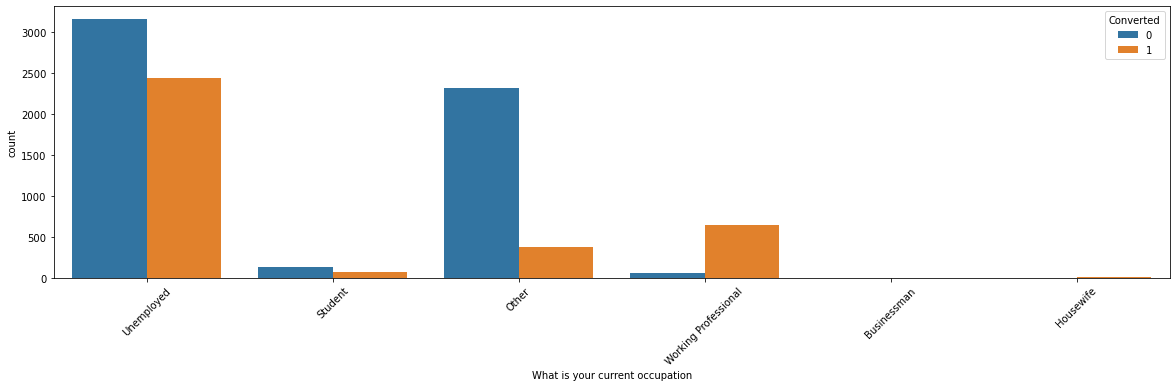

In [51]:
# Lets plot with target variable to understand 

plt.figure(figsize=(20,5))
s = sns.countplot(x = "What is your current occupation", hue = "Converted", data = Lead_dropnull)
s.set_xticklabels(s.get_xticklabels(),rotation=45)
plt.show()

#### Working Professional and Housewife are more desirable to get converted 
#### More number of unemployeed people are applying and have better conversion

### What matters most to you in choosing a course Column

In [52]:
Lead_dropnull["What matters most to you in choosing a course"].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [53]:
# We have large number with Nan so lets categories these as Other as it already exists 
# Also Flexibility & Convenience so we will replace it with Other 

Lead_dropnull.loc[(Lead_dropnull['What matters most to you in choosing a course'].isnull()==True),  'What matters most to you in choosing a course'] = 'Other'

Lead_dropnull['What matters most to you in choosing a course'] = Lead_dropnull['What matters most to you in choosing a course'].replace(["Flexibility & Convenience"], 'Other')

#Verifying the dataframe
Lead_dropnull['What matters most to you in choosing a course'].value_counts()

Better Career Prospects    6528
Other                      2712
Name: What matters most to you in choosing a course, dtype: int64

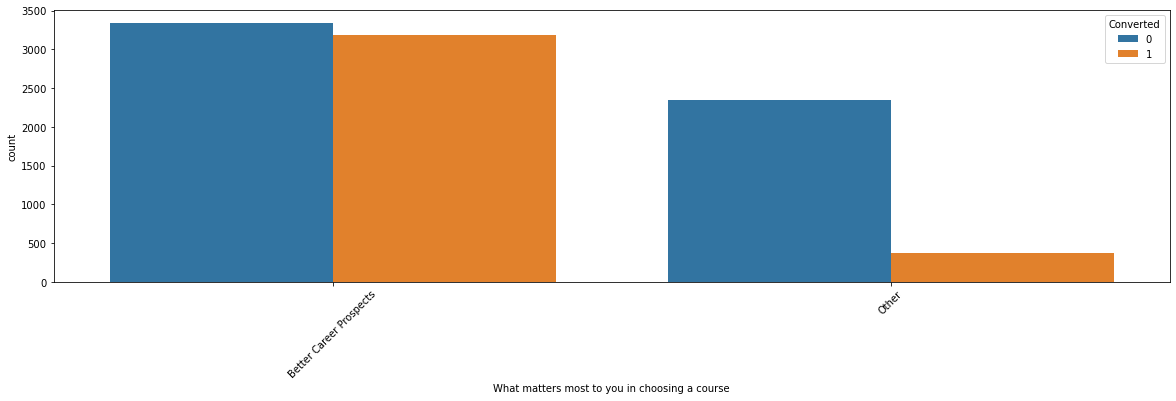

In [54]:
# Lets plot with target variable to understand 

plt.figure(figsize=(20,5))
s = sns.countplot(x = "What matters most to you in choosing a course", hue = "Converted", data = Lead_dropnull)
s.set_xticklabels(s.get_xticklabels(),rotation=45)
plt.show()

#### People looking for better career Prospects has more chances to convert

## Last Notable Activity column

In [55]:
Lead_dropnull["Last Notable Activity"].value_counts(dropna=False)

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Resubscribed to emails             1
Email Received                     1
Form Submitted on Website          1
Approached upfront                 1
View in browser link Clicked       1
Name: Last Notable Activity, dtype: int64

In [56]:
#Finding column with single digit response count

source_lst4=Lead_dropnull['Last Notable Activity'].value_counts(dropna=False)
source_lst4=source_lst4[source_lst4<10].index.to_list()
source_lst4

['Email Marked Spam',
 'Resubscribed to emails',
 'Email Received',
 'Form Submitted on Website',
 'Approached upfront',
 'View in browser link Clicked']

In [57]:
#Replacing values with Other

Lead_dropnull['Last Notable Activity'] = Lead_dropnull['Last Notable Activity'].replace(source_lst4,'Other')
Lead_dropnull['Last Notable Activity'].value_counts(dropna=False)

Modified                    3407
Email Opened                2827
SMS Sent                    2172
Page Visited on Website      318
Olark Chat Conversation      183
Email Link Clicked           173
Email Bounced                 60
Unsubscribed                  47
Unreachable                   32
Had a Phone Conversation      14
Other                          7
Name: Last Notable Activity, dtype: int64

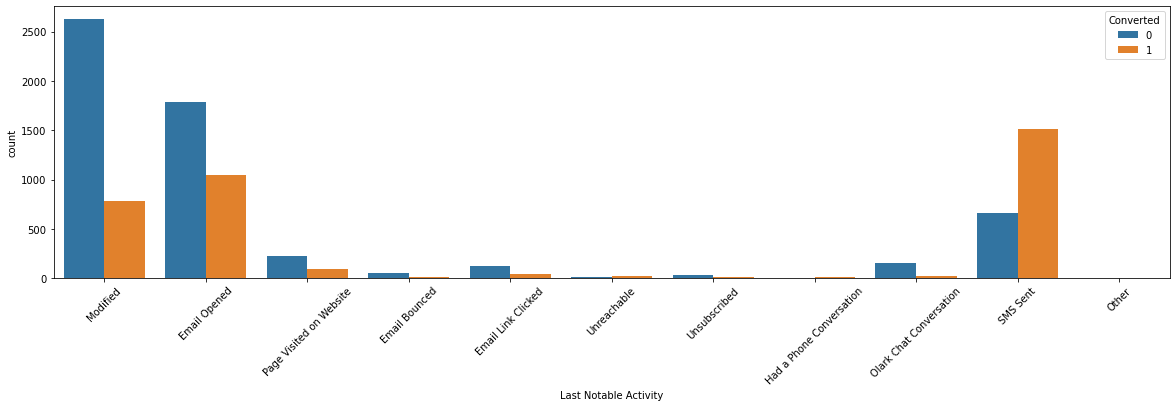

In [58]:
# Lets plot with target variable Vs  to understand 

plt.figure(figsize=(20,5))
s = sns.countplot(x = "Last Notable Activity", hue = "Converted", data = Lead_dropnull)
s.set_xticklabels(s.get_xticklabels(),rotation=45)
plt.show()

##### We can see people who has sent SMS has higher chances of conversion

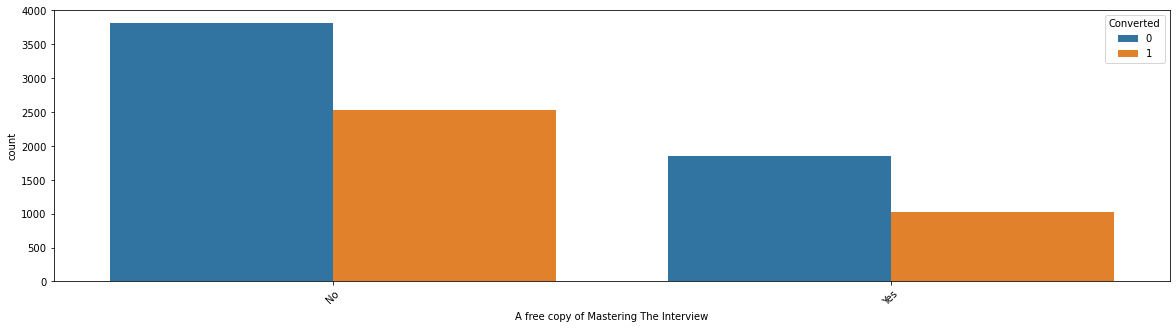

In [59]:
# Lets plot with target variable Vs A free copy of Mastering The Interview to understand 

plt.figure(figsize=(20,5))
s = sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = Lead_dropnull)
s.set_xticklabels(s.get_xticklabels(),rotation=45)
plt.show()

#### Dropping Tag Column as it has been created by sales team

In [60]:
#### We can see Tag has been created by sales team so we will drop these columns. Also Last notable activity 
# & Last Activity has been noted by sales team so we will drop it

Lead_dropnull.drop("Tags", inplace=True, axis=1)

In [61]:
Lead_dropnull.drop("Last Notable Activity", inplace=True, axis=1)

In [62]:
Lead_dropnull.drop("Last Activity", inplace=True, axis=1)

In [63]:
# Verifying the Dataframe 

Lead_dropnull.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9240 non-null   int64  
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9240 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9240 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Country                                        9240 non-null   object 
 8   Specialization                                 9240 non-null   object 
 9   What is your current occupation                9240 

## Now we have done with data cleaning part. Lets create Dummy variables 

In [64]:
# Lets change the dataframe name for fruther use 

df=Lead_dropnull
df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,A free copy of Mastering The Interview
0,660737,API,Olark Chat,No,0,0.0,0,unknown,Unknown Specialization,Unemployed,Better Career Prospects,No
1,660728,API,Organic Search,No,0,5.0,674,India,Unknown Specialization,Unemployed,Better Career Prospects,No
2,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,India,Business Administration,Student,Better Career Prospects,Yes
3,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,India,Media and Advertising,Unemployed,Better Career Prospects,No
4,660681,Landing Page Submission,Google,No,1,2.0,1428,India,Unknown Specialization,Unemployed,Better Career Prospects,No


In [65]:
# Now we will convert Yes/No binary response into 0 and 1
# Lets first find columns with binary response 

two_val_col=[]
for col in df.columns:
    if len(df[col].value_counts(dropna=False))==2:
        two_val_col.append(col)
two_val_col

['Do Not Email',
 'Converted',
 'What matters most to you in choosing a course',
 'A free copy of Mastering The Interview']

In [66]:
# Lets find the Yes/No response 

for col in two_val_col:
    print(Lead_dropnull[col].value_counts(dropna=False),'\n')

No     8506
Yes     734
Name: Do Not Email, dtype: int64 

0    5679
1    3561
Name: Converted, dtype: int64 

Better Career Prospects    6528
Other                      2712
Name: What matters most to you in choosing a course, dtype: int64 

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64 



In [67]:
# We have to convert Do Not Email and A free copy of Mastering The Interview into 0 & 1 
# Lets define a function 

def convert_binary(df, varlist):
    df[varlist]=df[varlist].apply(lambda x:x.map({'yes':1,'Yes':1,'no':0,'No':0}))

In [68]:
lst=['Do Not Email','A free copy of Mastering The Interview']
convert_binary(df,lst)
df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,A free copy of Mastering The Interview
0,660737,API,Olark Chat,0,0,0.0,0,unknown,Unknown Specialization,Unemployed,Better Career Prospects,0
1,660728,API,Organic Search,0,0,5.0,674,India,Unknown Specialization,Unemployed,Better Career Prospects,0
2,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,India,Business Administration,Student,Better Career Prospects,1
3,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,India,Media and Advertising,Unemployed,Better Career Prospects,0
4,660681,Landing Page Submission,Google,0,1,2.0,1428,India,Unknown Specialization,Unemployed,Better Career Prospects,0


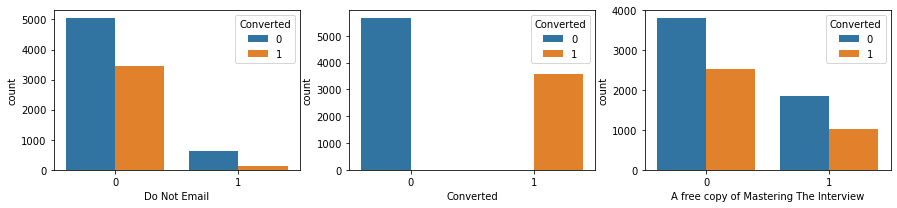

In [69]:
#lets visualize the numerical columns Vs Target variables

num_col = ['Do Not Email', 'Converted', 'A free copy of Mastering The Interview', ]

plt.figure(figsize=(15,10))
for i in enumerate(num_col):
    plt.subplot(3,3,i[0]+1)
    sns.countplot(x = i[1], hue = "Converted", data =df)
plt.show()

##### People who said No to do not email has higer conversion chance 
#### People who said No to A free copy of Mastering The Interview has higer conversion chance 

## Lets create dummy variables for categorical variables

In [70]:
# Lets find columns for categorical variables

cat_col = list(set(df.columns)-set(df.describe().columns))

In [71]:
for i in cat_col:
    print('column ' , i, '\n',df[i].value_counts(),'\n')

column  Lead Origin 
 Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64 

column  Country 
 India                   6492
unknown                 2466
Other Countries           77
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Name: Country, dtype: int64 

column  What matters most to you in choosing a course 
 Better Career Prospects    6528
Other                      2712
Name: What matters most to you in choosing a course, dtype: int64 

column  Specialization 
 Unknown Specialization               3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration

In [72]:
# Lead Origin

lo= pd.get_dummies(df['Lead Origin'], prefix='Lead Origin')

# Removing Quick Add Form as it has single response

lo1 = lo.drop(['Lead Origin_Quick Add Form'], 1)

#Adding the results to the master dataframe
df = pd.concat([df,lo1], axis=1)

In [73]:
# Lets drop Lead Origin as we have created dummies 

df.drop("Lead Origin", axis=1, inplace=True)

In [74]:
# Verifying the dataframe

df.head()

,Lead Number,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import
0,660737,Olark Chat,0,0,0.0,0,unknown,Unknown Specialization,Unemployed,Better Career Prospects,0,1,0,0,0
1,660728,Organic Search,0,0,5.0,674,India,Unknown Specialization,Unemployed,Better Career Prospects,0,1,0,0,0
2,660727,Direct Traffic,0,1,2.0,1532,India,Business Administration,Student,Better Career Prospects,1,0,1,0,0
3,660719,Direct Traffic,0,0,1.0,305,India,Media and Advertising,Unemployed,Better Career Prospects,0,0,1,0,0
4,660681,Google,0,1,2.0,1428,India,Unknown Specialization,Unemployed,Better Career Prospects,0,0,1,0,0


#### Lead Source

In [75]:
# Lead Source

ls= pd.get_dummies(df['Lead Source'], prefix='Lead Source')

# Removing Others as it has less response

ls1 = ls.drop(['Lead Source_Others'], 1)

#Adding the results to the master dataframe
df = pd.concat([df,ls1], axis=1)

#Dropping Lead Source column

df.drop("Lead Source", axis=1, inplace=True)

In [76]:
#Country

c= pd.get_dummies(df['Country'], prefix='Country')

# Removing unknown as it has less significance 

c1 = c.drop(['Country_unknown'], 1)

#Adding the results to the master dataframe
df = pd.concat([df,c1], axis=1)

#Dropping Country column

df.drop("Country", axis=1, inplace=True)

In [77]:
#Specialization
s= pd.get_dummies(df['Specialization'], prefix='Specialization')

# Removing unknown as it has less significance 

s1 = s.drop(['Specialization_Unknown Specialization'], 1)

#Adding the results to the master dataframe
df = pd.concat([df,s1], axis=1)

#Dropping Country column

df.drop("Specialization", axis=1, inplace=True)

In [78]:
#What is your current occupation

co= pd.get_dummies(df['What is your current occupation'], prefix='Occupation')

# Removing Other as it has less significance 

co1 = co.drop(['Occupation_Other'], 1)

#Adding the results to the master dataframe
df = pd.concat([df,co1], axis=1)

#Dropping Country column

df.drop("What is your current occupation", axis=1, inplace=True)

In [79]:
#What matters most to you in choosing a course

wm= pd.get_dummies(df['What matters most to you in choosing a course'], prefix='Matters')

# Removing Other as it has less significance 

wm1 = wm.drop(['Matters_Other'], 1)

#Adding the results to the master dataframe
df = pd.concat([df,wm1], axis=1)

#Dropping Country column

df.drop("What matters most to you in choosing a course", axis=1, inplace=True)

In [80]:
#Verfying dataframe 

df.shape

(9240, 51)

In [81]:
df.head()

,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Country_Australia,Country_India,Country_Other Countries,Country_Qatar,Country_Saudi Arabia,Country_Singapore,Country_United Arab Emirates,...,Country_United States,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Occupation_Businessman,Occupation_Housewife,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Matters_Better Career Prospects
0,660737,0,0,0.0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1,660728,0,0,5.0,674,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,660727,0,1,2.0,1532,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,660719,0,0,1.0,305,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
4,660681,0,1,2.0,1428,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 51 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Lead Number                                       9240 non-null   int64  
 1   Do Not Email                                      9240 non-null   int64  
 2   Converted                                         9240 non-null   int64  
 3   TotalVisits                                       9240 non-null   float64
 4   Total Time Spent on Website                       9240 non-null   int64  
 5   A free copy of Mastering The Interview            9240 non-null   int64  
 6   Lead Origin_API                                   9240 non-null   uint8  
 7   Lead Origin_Landing Page Submission               9240 non-null   uint8  
 8   Lead Origin_Lead Add Form                         9240 non-null   uint8  
 9   Lead Origin_Lead Im

In [83]:
# Checking Imbalance 

sum(df["Converted"])/len(df["Converted"])*100

38.53896103896104

#### We can see the imbalance % is 38.53

## Creating a Model 

### Train and Test dataset spliting 

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
# Putting feature variable to X

X = df.drop(['Converted', "Lead Number"], axis=1)

X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Country_Australia,Country_India,Country_Other Countries,Country_Qatar,Country_Saudi Arabia,Country_Singapore,Country_United Arab Emirates,Country_United Kingdom,Country_United States,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Occupation_Businessman,Occupation_Housewife,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Matters_Better Career Prospects
0,0,0.0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1,0,5.0,674,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,0,2.0,1532,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,0,1.0,305,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
4,0,2.0,1428,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


In [86]:
# assigning target variable to y

y=df["Converted"]

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [87]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Feature Scaling

In [88]:
# Using MinMax scaler lets standardize the values

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [89]:
num_cols= ["TotalVisits","Total Time Spent on Website"]

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Country_Australia,Country_India,Country_Other Countries,Country_Qatar,Country_Saudi Arabia,Country_Singapore,Country_United Arab Emirates,Country_United Kingdom,Country_United States,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Occupation_Businessman,Occupation_Housewife,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Matters_Better Career Prospects
1871,0,0.000000,0.000000,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1
6795,0,0.235294,0.214349,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3516,0,0.294118,0.046655,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
8105,0,0.294118,0.541373,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
3934,0,0.000000,0.000000,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


## Model Building 

#### Running the model on the Train dataset

### Feature selection from RFE

In [90]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [91]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [92]:
rfe.support_

array([ True,  True,  True, False,  True,  True,  True,  True, False,
       False, False,  True, False, False, False,  True, False, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False,  True,
       False, False,  True,  True])

In [93]:
list(zip(X_train.columns, rfe.support_ , rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('A free copy of Mastering The Interview', False, 32),
 ('Lead Origin_API', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Direct Traffic', False, 25),
 ('Lead Source_Facebook', False, 15),
 ('Lead Source_Google', False, 31),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 29),
 ('Lead Source_Reference', False, 35),
 ('Lead Source_Referral Sites', False, 21),
 ('Lead Source_Welingak Website', True, 1),
 ('Country_Australia', False, 16),
 ('Country_India', False, 19),
 ('Country_Other Countries', False, 18),
 ('Country_Qatar', True, 1),
 ('Country_Saudi Arabia', True, 1),
 ('Country_Singapore', False, 20),
 ('Country_United Arab Emirates', False, 34),
 ('Country_United Kingdom', False, 17),
 ('Country_United States', False, 30),
 ('Specialization_Banking

In [94]:
# We will extract these columns 
col=X_train.columns[rfe.support_]

In [95]:
X_train.columns[~rfe.support_]

Index(['A free copy of Mastering The Interview', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Country_Australia', 'Country_India',
       'Country_Other Countries', 'Country_Singapore',
       'Country_United Arab Emirates', 'Country_United Kingdom',
       'Country_United States',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations 

##### Assessing the model with StatsModels

In [96]:
X_train_sm = sm.add_constant(X_train[col])
logm1= sm.GLM(y_train, X_train_sm, family= sm.families.Binomial())
res1=logm1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2876.2
Date:                Mon, 12 Apr 2021   Deviance:                       5752.4
Time:                        23:04:33   Pearson chi2:                 7.42e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    19.0191   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Do Not Email                             -1.3022      0.161     -8.105      0.000      -1.617      -0.987
TotalVisits                               0.8491      0.198      4.280      0.000       0.460       1.238
Total Time Spent on Website               4.5283      0.159     28.472      0.000       4.217       4.840
Lead Origin_API                         -22.1076   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Origin_Landing Page Submission     -22.2858   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Origin_Lead Add Form               -18.5711   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Origin_Lead Import                 -22.4369   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Olark Chat                    1.0340      0.120      8.647      0.000       0.800       1.268
Lead Source_Welingak Website              2.1321      0.741      2.879      0.004       0.681       3.583
Country_Qatar                           -23.5075   2.43e+04     -0.001      0.999   -4.76e+04    4.76e+04
Country_Saudi Arabia                     -1.0180      0.801     -1.270      0.204      -2.588       0.552
Specialization_Rural and Agribusiness     0.5504      0.375      1.469      0.142      -0.184       1.285
Occupation_Housewife                     23.4464   2.25e+04      0.001      0.999   -4.41e+04    4.41e+04
Occupation_Working Professional           2.5759      0.182     14.165      0.000       2.219       2.932
Matters_Better Career Prospects           1.2640      0.082     15.334      0.000       1.102       1.426
=========================================================================================================
"""

### Checking VIFs

In [97]:
# Check for the VIF values of the feature variables. 

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [98]:
# Calculating Variance Inflation Factor
def vif(X):
    vif=pd.DataFrame()

    vif['Features']=X.columns
    vif['vif']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    vif['vif']=round(vif['vif'],2)
    vif=vif.sort_values(by='vif',ascending=False)
    return vif

In [99]:
vif(X_train[col])

,Features,vif
4,Lead Origin_Landing Page Submission,4.55
3,Lead Origin_API,4.02
14,Matters_Better Career Prospects,3.80
1,TotalVisits,2.94
7,Lead Source_Olark Chat,2.47
2,Total Time Spent on Website,2.25
5,Lead Origin_Lead Add Form,1.71
8,Lead Source_Welingak Website,1.24
13,Occupation_Working Professional,1.19
0,Do Not Email,1.11


In [100]:
# We can see that probability for Lead Origin_Landing Page Submission is 1 & high VIF so lets drop it

col = col.drop('Lead Origin_Landing Page Submission', 1)
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_API', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Country_Qatar', 'Country_Saudi Arabia',
       'Specialization_Rural and Agribusiness', 'Occupation_Housewife',
       'Occupation_Working Professional', 'Matters_Better Career Prospects'],
      dtype='object')

## Iteration 2

In [101]:
# Re-running the model 

X_train_sm2 = sm.add_constant(X_train[col])
logm2= sm.GLM(y_train, X_train_sm2, family= sm.families.Binomial())
res2=logm2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2876.5
Date:                Mon, 12 Apr 2021   Deviance:                       5752.9
Time:                        23:04:34   Pearson chi2:                 7.42e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.2678      0.113    -28.968      0.000      -3.489      -3.047
Do Not Email                             -1.2971      0.160     -8.097      0.000      -1.611      -0.983
TotalVisits                               0.8484      0.198      4.276      0.000       0.460       1.237
Total Time Spent on Website               4.5318      0.159     28.511      0.000       4.220       4.843
Lead Origin_API                           0.1779      0.085      2.090      0.037       0.011       0.345
Lead Origin_Lead Add Form                 3.7147      0.193     19.204      0.000       3.336       4.094
Lead Origin_Lead Import                  -0.1509      0.523     -0.288      0.773      -1.177       0.875
Lead Source_Olark Chat                    1.0349      0.120      8.654      0.000       0.801       1.269
Lead Source_Welingak Website              2.1315      0.740      2.879      0.004       0.680       3.583
Country_Qatar                           -23.5090   2.43e+04     -0.001      0.999   -4.76e+04    4.76e+04
Country_Saudi Arabia                     -1.0197      0.801     -1.272      0.203      -2.590       0.551
Specialization_Rural and Agribusiness     0.5500      0.375      1.468      0.142      -0.184       1.284
Occupation_Housewife                     23.4466   2.25e+04      0.001      0.999   -4.41e+04    4.41e+04
Occupation_Working Professional           2.5756      0.182     14.164      0.000       2.219       2.932
Matters_Better Career Prospects           1.2644      0.082     15.339      0.000       1.103       1.426
=========================================================================================================
"""

In [102]:
vif(X_train[col])

,Features,vif
13,Matters_Better Career Prospects,2.72
3,Lead Origin_API,2.43
6,Lead Source_Olark Chat,2.17
1,TotalVisits,2.14
2,Total Time Spent on Website,2.03
4,Lead Origin_Lead Add Form,1.51
7,Lead Source_Welingak Website,1.24
12,Occupation_Working Professional,1.19
0,Do Not Email,1.06
5,Lead Origin_Lead Import,1.01


#### We can see Country_Qatar has high probability(1). So lets drop it

In [103]:
# We can see that probability for Occupation_Housewife is 1 so lets drop it

col = col.drop('Country_Qatar', 1)
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_API', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Country_Saudi Arabia',
       'Specialization_Rural and Agribusiness', 'Occupation_Housewife',
       'Occupation_Working Professional', 'Matters_Better Career Prospects'],
      dtype='object')

## Iteration 3

In [104]:
# Re-running the model 

X_train_sm3 = sm.add_constant(X_train[col])
logm3= sm.GLM(y_train, X_train_sm3, family= sm.families.Binomial())
res3=logm3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2880.5
Date:                Mon, 12 Apr 2021   Deviance:                       5760.9
Time:                        23:04:34   Pearson chi2:                 7.43e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.2707      0.113    -29.007      0.000      -3.492      -3.050
Do Not Email                             -1.2938      0.160     -8.078      0.000      -1.608      -0.980
TotalVisits                               0.8589      0.198      4.332      0.000       0.470       1.247
Total Time Spent on Website               4.5242      0.159     28.504      0.000       4.213       4.835
Lead Origin_API                           0.1818      0.085      2.137      0.033       0.015       0.348
Lead Origin_Lead Add Form                 3.7199      0.193     19.234      0.000       3.341       4.099
Lead Origin_Lead Import                  -0.1456      0.523     -0.278      0.781      -1.171       0.880
Lead Source_Olark Chat                    1.0357      0.120      8.665      0.000       0.801       1.270
Lead Source_Welingak Website              2.1313      0.740      2.878      0.004       0.680       3.583
Country_Saudi Arabia                     -1.0155      0.801     -1.267      0.205      -2.586       0.555
Specialization_Rural and Agribusiness     0.5531      0.375      1.477      0.140      -0.181       1.287
Occupation_Housewife                     22.4511   1.36e+04      0.002      0.999   -2.67e+04    2.68e+04
Occupation_Working Professional           2.5792      0.182     14.185      0.000       2.223       2.936
Matters_Better Career Prospects           1.2615      0.082     15.310      0.000       1.100       1.423
=========================================================================================================
"""

In [105]:
# Checking for VIF

vif(X_train[col])

,Features,vif
12,Matters_Better Career Prospects,2.72
3,Lead Origin_API,2.43
6,Lead Source_Olark Chat,2.17
1,TotalVisits,2.14
2,Total Time Spent on Website,2.03
4,Lead Origin_Lead Add Form,1.51
7,Lead Source_Welingak Website,1.24
11,Occupation_Working Professional,1.19
0,Do Not Email,1.06
5,Lead Origin_Lead Import,1.01


#### We can see there is high probability(1) for Occupation_Housewife. So lets drop it

In [106]:
col = col.drop('Occupation_Housewife', 1)
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_API', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Country_Saudi Arabia',
       'Specialization_Rural and Agribusiness',
       'Occupation_Working Professional', 'Matters_Better Career Prospects'],
      dtype='object')

## Iteration 4

In [107]:
# Re-running the model 

X_train_sm4 = sm.add_constant(X_train[col])
logm4= sm.GLM(y_train, X_train_sm4, family= sm.families.Binomial())
res4=logm4.fit()
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2885.7
Date:                Mon, 12 Apr 2021   Deviance:                       5771.5
Time:                        23:04:35   Pearson chi2:                 7.45e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.2634      0.113    -28.977      0.000      -3.484      -3.043
Do Not Email                             -1.2987      0.160     -8.107      0.000      -1.613      -0.985
TotalVisits                               0.8472      0.198      4.275      0.000       0.459       1.236
Total Time Spent on Website               4.5217      0.159     28.509      0.000       4.211       4.833
Lead Origin_API                           0.1757      0.085      2.067      0.039       0.009       0.342
Lead Origin_Lead Add Form                 3.7247      0.193     19.290      0.000       3.346       4.103
Lead Origin_Lead Import                  -0.1538      0.523     -0.294      0.769      -1.179       0.871
Lead Source_Olark Chat                    1.0329      0.119      8.644      0.000       0.799       1.267
Lead Source_Welingak Website              2.1172      0.740      2.859      0.004       0.666       3.568
Country_Saudi Arabia                     -1.0186      0.801     -1.272      0.203      -2.588       0.551
Specialization_Rural and Agribusiness     0.5483      0.375      1.464      0.143      -0.186       1.282
Occupation_Working Professional           2.5736      0.182     14.156      0.000       2.217       2.930
Matters_Better Career Prospects           1.2648      0.082     15.355      0.000       1.103       1.426
=========================================================================================================
"""

In [108]:
# Checking for VIF

vif(X_train[col])

,Features,vif
11,Matters_Better Career Prospects,2.72
3,Lead Origin_API,2.43
6,Lead Source_Olark Chat,2.17
1,TotalVisits,2.14
2,Total Time Spent on Website,2.03
4,Lead Origin_Lead Add Form,1.51
7,Lead Source_Welingak Website,1.24
10,Occupation_Working Professional,1.19
0,Do Not Email,1.06
5,Lead Origin_Lead Import,1.01


#### We can see Lead Origin_Lead Import has high p value(0.769). So lets drop it

In [109]:
col = col.drop('Lead Origin_Lead Import', 1)
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_API', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Country_Saudi Arabia', 'Specialization_Rural and Agribusiness',
       'Occupation_Working Professional', 'Matters_Better Career Prospects'],
      dtype='object')

## Iteration 5

In [110]:
# Re-running the model 

X_train_sm5 = sm.add_constant(X_train[col])
logm5= sm.GLM(y_train, X_train_sm5, family= sm.families.Binomial())
res5=logm5.fit()
res5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2885.8
Date:                Mon, 12 Apr 2021   Deviance:                       5771.6
Time:                        23:04:35   Pearson chi2:                 7.45e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.2663      0.112    -29.107      0.000      -3.486      -3.046
Do Not Email                             -1.2980      0.160     -8.103      0.000      -1.612      -0.984
TotalVisits                               0.8510      0.198      4.303      0.000       0.463       1.239
Total Time Spent on Website               4.5239      0.158     28.550      0.000       4.213       4.834
Lead Origin_API                           0.1770      0.085      2.085      0.037       0.011       0.343
Lead Origin_Lead Add Form                 3.7275      0.193     19.326      0.000       3.349       4.105
Lead Source_Olark Chat                    1.0343      0.119      8.662      0.000       0.800       1.268
Lead Source_Welingak Website              2.1171      0.740      2.859      0.004       0.666       3.568
Country_Saudi Arabia                     -1.0180      0.801     -1.271      0.204      -2.588       0.552
Specialization_Rural and Agribusiness     0.5492      0.375      1.466      0.143      -0.185       1.283
Occupation_Working Professional           2.5735      0.182     14.158      0.000       2.217       2.930
Matters_Better Career Prospects           1.2648      0.082     15.353      0.000       1.103       1.426
=========================================================================================================
"""

In [111]:
# Checking for VIF

vif(X_train[col])

,Features,vif
10,Matters_Better Career Prospects,2.70
3,Lead Origin_API,2.43
5,Lead Source_Olark Chat,2.17
1,TotalVisits,2.14
2,Total Time Spent on Website,2.03
4,Lead Origin_Lead Add Form,1.51
6,Lead Source_Welingak Website,1.24
9,Occupation_Working Professional,1.19
0,Do Not Email,1.06
8,Specialization_Rural and Agribusiness,1.01


## Iteration 6

In [112]:
#We can see Country_Saudi Arabia has high probability(0.2) so lets drop it

col = col.drop('Country_Saudi Arabia', 1)
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_API', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Specialization_Rural and Agribusiness',
       'Occupation_Working Professional', 'Matters_Better Career Prospects'],
      dtype='object')

In [113]:
# Re-running the model 

X_train_sm6 = sm.add_constant(X_train[col])
logm6= sm.GLM(y_train, X_train_sm6, family= sm.families.Binomial())
res6=logm6.fit()
res6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6457
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2886.7
Date:                Mon, 12 Apr 2021   Deviance:                       5773.3
Time:                        23:04:36   Pearson chi2:                 7.45e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.2683      0.112    -29.138      0.000      -3.488      -3.049
Do Not Email                             -1.3052      0.160     -8.143      0.000      -1.619      -0.991
TotalVisits                               0.8523      0.198      4.312      0.000       0.465       1.240
Total Time Spent on Website               4.5208      0.158     28.545      0.000       4.210       4.831
Lead Origin_API                           0.1800      0.085      2.121      0.034       0.014       0.346
Lead Origin_Lead Add Form                 3.7305      0.193     19.342      0.000       3.352       4.109
Lead Source_Olark Chat                    1.0324      0.119      8.648      0.000       0.798       1.266
Lead Source_Welingak Website              2.1179      0.740      2.860      0.004       0.667       3.569
Specialization_Rural and Agribusiness     0.5519      0.375      1.474      0.141      -0.182       1.286
Occupation_Working Professional           2.5701      0.182     14.148      0.000       2.214       2.926
Matters_Better Career Prospects           1.2648      0.082     15.352      0.000       1.103       1.426
=========================================================================================================
"""

In [114]:
# Checking for VIF

vif(X_train[col])

,Features,vif
9,Matters_Better Career Prospects,2.70
3,Lead Origin_API,2.43
5,Lead Source_Olark Chat,2.17
1,TotalVisits,2.14
2,Total Time Spent on Website,2.03
4,Lead Origin_Lead Add Form,1.51
6,Lead Source_Welingak Website,1.24
8,Occupation_Working Professional,1.19
0,Do Not Email,1.06
7,Specialization_Rural and Agribusiness,1.01


In [115]:
#Specialization_Rural and Agribusiness has high p value(0.141) so lets drop it

col = col.drop('Specialization_Rural and Agribusiness', 1)
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_API', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Occupation_Working Professional', 'Matters_Better Career Prospects'],
      dtype='object')

## Iteration 7

In [116]:
# Re-running the model 

X_train_sm7 = sm.add_constant(X_train[col])
logm7= sm.GLM(y_train, X_train_sm7, family= sm.families.Binomial())
res7=logm7.fit()
res7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6458
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2887.7
Date:                Mon, 12 Apr 2021   Deviance:                       5775.5
Time:                        23:04:37   Pearson chi2:                 7.44e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -3.2651      0.112    -29.128      0.000      -3.485      -3.045
Do Not Email                       -1.3024      0.160     -8.124      0.000      -1.617      -0.988
TotalVisits                         0.8588      0.197      4.351      0.000       0.472       1.246
Total Time Spent on Website         4.5186      0.158     28.544      0.000       4.208       4.829
Lead Origin_API                     0.1752      0.085      2.067      0.039       0.009       0.341
Lead Origin_Lead Add Form           3.7283      0.193     19.336      0.000       3.350       4.106
Lead Source_Olark Chat              1.0344      0.119      8.667      0.000       0.801       1.268
Lead Source_Welingak Website        2.1139      0.740      2.855      0.004       0.663       3.565
Occupation_Working Professional     2.5679      0.182     14.142      0.000       2.212       2.924
Matters_Better Career Prospects     1.2670      0.082     15.381      0.000       1.106       1.428
===================================================================================================
"""

In [117]:
# Checking for VIF

vif(X_train[col])

,Features,vif
8,Matters_Better Career Prospects,2.69
3,Lead Origin_API,2.42
5,Lead Source_Olark Chat,2.17
1,TotalVisits,2.13
2,Total Time Spent on Website,2.03
4,Lead Origin_Lead Add Form,1.51
6,Lead Source_Welingak Website,1.24
7,Occupation_Working Professional,1.19
0,Do Not Email,1.06


### Now in iteration 7 we can see probability for all parameters are <0.05 and VIF is less than 5. So lets go ahead with this model. 

### Predicating y value 

In [118]:
y_train_pred = res7.predict(X_train_sm7).values.reshape(-1)

In [119]:
y_train_pred[:10]

array([0.31250204, 0.30417039, 0.41944541, 0.66833812, 0.31250204,
       0.97722486, 0.18611362, 0.99420339, 0.1948946 , 0.80801312])

#### Creating a dataframe with the actual converted flag  and the predicted probabilities

In [120]:
# assigning a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads.

y_train_pred_df = pd.DataFrame({'Converted':y_train.values, 'Lead_Score':np.round(y_train_pred*100).astype(int), 'Converted_prob':y_train_pred})
y_train_pred_df['LeadID'] = y_train.index
y_train_pred_df.head()

,Converted,Lead_Score,Converted_prob,LeadID
0,0,31,0.312502,1871
1,0,30,0.304170,6795
2,0,42,0.419445,3516
3,0,67,0.668338,8105
4,0,31,0.312502,3934


### Plotting the ROC Curve

In [121]:
from sklearn import metrics
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [122]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_df.Converted, y_train_pred_df.Converted_prob, drop_intermediate = False )

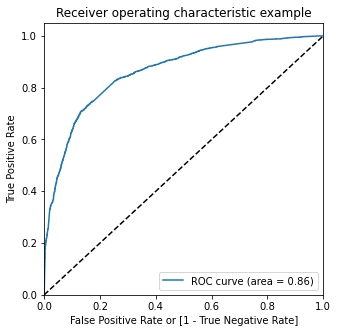

In [123]:
draw_roc(y_train_pred_df.Converted, y_train_pred_df.Converted_prob)

#### We have good ROC curve with better performance 


### We need to find out optimal probability cut off to get high conversion rate 

In [124]:
# Let's create columns with different probability cutoffs 
numbers=[float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_df[i]=y_train_pred_df.Converted_prob.map(lambda x:1 if x>i else 0)

y_train_pred_df.head() 

,Converted,Lead_Score,Converted_prob,LeadID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,31,0.312502,1871,1,1,1,1,0,0,0,0,0,0
1,0,30,0.304170,6795,1,1,1,1,0,0,0,0,0,0
2,0,42,0.419445,3516,1,1,1,1,1,0,0,0,0,0
3,0,67,0.668338,8105,1,1,1,1,1,1,1,0,0,0
4,0,31,0.312502,3934,1,1,1,1,0,0,0,0,0,0


In [125]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','Accuracy','Sensitivity','Specificity'])
from sklearn import metrics

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_df.Converted, y_train_pred_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  Accuracy  Sensitivity  Specificity
0.0   0.0  0.381262     1.000000     0.000000
0.1   0.1  0.522263     0.983374     0.238131
0.2   0.2  0.696351     0.898621     0.571714
0.3   0.3  0.774119     0.832117     0.738381
0.4   0.4  0.807359     0.706813     0.869315
0.5   0.5  0.802103     0.652879     0.894053
0.6   0.6  0.788652     0.578264     0.918291
0.7   0.7  0.768398     0.487429     0.941529
0.8   0.8  0.741187     0.375101     0.966767
0.9   0.9  0.694960     0.211679     0.992754


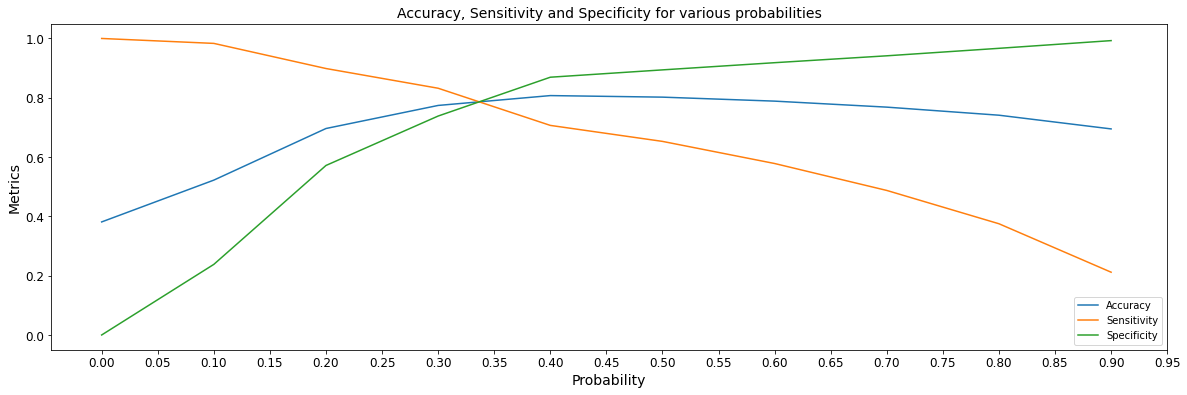

In [126]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['Accuracy','Sensitivity','Specificity'], figsize=(20,6))
plt.xticks(np.arange(0, 1, step=0.05), size = 12)
plt.yticks(size = 12)
plt.title('Accuracy, Sensitivity and Specificity for various probabilities', fontsize=14)
plt.xlabel('Probability', fontsize=14)
plt.ylabel('Metrics', fontsize=14)
##plt.vlines(x=0.3, ymax=1, ymin=0, colors="r", linestyles="--")
plt.show()

### From this curve we can see the optimum probabiity cut off is 0.34, Now lets do the predication with this probability 

In [127]:
# Lets create new column with probability cut off 0.34 as Converted or not

y_train_pred_df['final_predicted'] = y_train_pred_df.Converted_prob.map( lambda x: 1 if x > 0.34 else 0)

y_train_pred_df.head()

,Converted,Lead_Score,Converted_prob,LeadID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,31,0.312502,1871,1,1,1,1,0,0,0,0,0,0,0
1,0,30,0.304170,6795,1,1,1,1,0,0,0,0,0,0,0
2,0,42,0.419445,3516,1,1,1,1,1,0,0,0,0,0,1
3,0,67,0.668338,8105,1,1,1,1,1,1,1,0,0,0,1
4,0,31,0.312502,3934,1,1,1,1,0,0,0,0,0,0,0


#### Lets evaluate different metrics for this model

In [128]:
# Lets define the function 
# Calculating Paramerters of a Logistic Regression Model
def log_model_params(y_actual,y_predicted):
    from sklearn import metrics
    confusion=metrics.confusion_matrix(y_actual,y_predicted)
    TP=confusion[1,1]
    FP=confusion[0,1]
    TN=confusion[0,0]
    FN=confusion[1,0]
    accuracy=(TP+TN)/float(TP+TN+FP+FN)*100    
    sensitivity=TP/float(FN+TP)*100
    specificity=TN/float(TN+FP)*100
    FP_rate=100-specificity
    Positive_pred_value=TP/float(TP+FP)
    Negative_pred_value=TN/float(TN+FN)
    precision=TP/float(TP+FP)*100
    params={'accuracy':accuracy,'TN':TN,'FP':FP,'FN':FN,'TP':TP,'sensitivity':sensitivity,'specificity':specificity,'precision':precision,'False_Positive_Rate':FP_rate,'Positve_Prediction_value':Positive_pred_value,'Negative_Prediction_value':Negative_pred_value}
    return params

In [129]:
log_model_params(y_train_pred_df.Converted, y_train_pred_df.final_predicted)

{'accuracy': 79.94743351886208,
 'TN': 3358,
 'FP': 644,
 'FN': 653,
 'TP': 1813,
 'sensitivity': 73.51987023519871,
 'specificity': 83.9080459770115,
 'precision': 73.78917378917379,
 'False_Positive_Rate': 16.091954022988503,
 'Positve_Prediction_value': 0.7378917378917379,
 'Negative_Prediction_value': 0.837197706307654}

### From this model, we are getting accuracy of 80% and sensitivity of 73% which is not exactly matching with expectations of CEO to get conversion rate of 80%. If we decrease the probability cutoff then sensitivity will improve but resulting into loosing few leads which may get converted. So as per business requirment we can adjust the probability cutoff. 

## Lets make predictions on the test set

In [130]:
#first use Minmax scaler to convert numerical column

num_cols= ["TotalVisits","Total Time Spent on Website"]

X_test[num_cols] = scaler.transform(X_test[num_cols])

X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Country_Australia,Country_India,Country_Other Countries,Country_Qatar,Country_Saudi Arabia,Country_Singapore,Country_United Arab Emirates,Country_United Kingdom,Country_United States,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Occupation_Businessman,Occupation_Housewife,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Matters_Better Career Prospects
4269,0,0.470588,0.444982,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2376,0,0.000000,0.000000,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
7766,0,0.294118,0.025968,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1
9199,0,0.000000,0.000000,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
4359,0,0.000000,0.000000,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1


In [131]:
### Lets check the rfe columns again 
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_API', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Occupation_Working Professional', 'Matters_Better Career Prospects'],
      dtype='object')

In [132]:
#lets define X_test dataset

X_test=X_test[col]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Lead Origin_API,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Occupation_Working Professional,Matters_Better Career Prospects
4269,0,0.470588,0.444982,1,0,0,0,0,0
2376,0,0.000000,0.000000,0,1,0,0,0,1
7766,0,0.294118,0.025968,1,0,0,0,1,1
9199,0,0.000000,0.000000,1,0,1,0,0,1
4359,0,0.000000,0.000000,0,1,0,0,0,1


In [133]:
# Lets add the constant 
X_test_sm = sm.add_constant(X_test)

#### Making Predications on Test set

In [134]:
y_test_pred = res7.predict(X_test_sm).values.reshape(-1)

In [135]:
#checking 
y_test_pred

array([0.3373578 , 0.84943733, 0.75305323, ..., 0.31250204, 0.22829292,
       0.84943733])

In [136]:
# assigning a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads.

y_test_pred_df = pd.DataFrame({'Converted':y_test.values, 'Lead_Score':np.round(y_test_pred*100).astype(int), 'Converted_prob':y_test_pred})
y_test_pred_df['LeadID'] = y_test.index
y_test_pred_df.head()

,Converted,Lead_Score,Converted_prob,LeadID
0,1,34,0.337358,4269
1,1,85,0.849437,2376
2,1,75,0.753053,7766
3,0,31,0.312502,9199
4,1,85,0.849437,4359


In [137]:
# Lets create new column with probability cut off 0.36 as Converted or not

y_test_pred_df['final_predicted'] = y_test_pred_df.Converted_prob.map( lambda x: 1 if x > 0.34 else 0)

y_test_pred_df.head()

,Converted,Lead_Score,Converted_prob,LeadID,final_predicted
0,1,34,0.337358,4269,0
1,1,85,0.849437,2376,1
2,1,75,0.753053,7766,1
3,0,31,0.312502,9199,0
4,1,85,0.849437,4359,1


#### Lets evaluate different metrics for test dataset predications 

In [138]:
# Checking metrics

log_model_params(y_test_pred_df.Converted, y_test_pred_df.final_predicted)

{'accuracy': 79.47330447330447,
 'TN': 1403,
 'FP': 274,
 'FN': 295,
 'TP': 800,
 'sensitivity': 73.0593607305936,
 'specificity': 83.6612999403697,
 'precision': 74.487895716946,
 'False_Positive_Rate': 16.3387000596303,
 'Positve_Prediction_value': 0.74487895716946,
 'Negative_Prediction_value': 0.826266195524146}

### We can see the accuracy of test data set is 80% and sensitivity is 73% which is matching with Training dataset. So our model is performing good on both training and test dataset. 

### Assiging the Lead Score to each Lead Number in original dataframe

In [139]:
# Create Dataset with y_train Lead Number and Lead score
y_train_score = y_train_pred_df[['LeadID','Lead_Score']]

# Create Dataset with y_test Lead Number and Lead score
y_test_score = y_test_pred_df[['LeadID','Lead_Score']]

# Concatenate the y_train scores and the y_test scores
ld_score = pd.concat([y_train_score, y_test_score], ignore_index=True)

# Set the index of the final score dataset as the Lead Number to concatenate the score dataset to the original data
ld_score.set_index('LeadID', inplace=True)

# Inner Join the Original Leads dataset with the scores dataset. This will add a new column 'Lead_Score' to the 
# Original dataset. 
lead_original = lead_original.join(ld_score['Lead_Score'])

lead_original.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Lead_Score
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified,31
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened,44
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened,76
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified,21
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified,72


#### For Lead_score>34 are the hot leads that sales team can approach

In [140]:
# verifying how many leads has been predicted correctly by our model. 

Check_df=lead_original[lead_original["Lead_Score"]>34]
Check_df.shape

(3518, 38)

In [141]:
Check_df.Converted.sum()/len(Check_df)

0.7418988061398522

### 74% of the leads has been predicted correctly by model with lead score>34. If we want to make this to 80 % then we need to adjust the lead score cutoff. But that will result into loosing few converting leads

### Determining the coefficient and Final equation for the model

In [142]:
#getting list of coefficient 
res7.params[1:].sort_values(ascending=False)

Total Time Spent on Website        4.518553
Lead Origin_Lead Add Form          3.728325
Occupation_Working Professional    2.567932
Lead Source_Welingak Website       2.113933
Matters_Better Career Prospects    1.267010
Lead Source_Olark Chat             1.034445
TotalVisits                        0.858788
Lead Origin_API                    0.175237
Do Not Email                      -1.302376
dtype: float64

In [143]:
# Lets create equation for the model

equation=''
lst=res7.params[1:].sort_values(ascending=False)
for i in range(lst.shape[0]):
    equation=equation+'('+str(np.round(lst[i],2))+')'+'*'+lst.index[i]+' + '
equation=equation+'('+str(np.round(res6.params[0],2))+')'
equation

'(4.52)*Total Time Spent on Website + (3.73)*Lead Origin_Lead Add Form + (2.57)*Occupation_Working Professional + (2.11)*Lead Source_Welingak Website + (1.27)*Matters_Better Career Prospects + (1.03)*Lead Source_Olark Chat + (0.86)*TotalVisits + (0.18)*Lead Origin_API + (-1.3)*Do Not Email + (-3.27)'

# Conclusion 

#### X-Education has to focus on below variables to find potential leads

1. Total Time Spent on Website
2. Lead Origin_Lead Add Form
3. Occupation_Working Professional
4. Lead Source_Welingak Website
5. Do Not Email 
6. Matters_Better Career Prospects
7. Lead Source_Olark Chat
8. TotalVisits
9. Lead Origin_API 

#### Below are the few more inferences from EDA

1. We can see that if the lead source is Reference and Welingak Website then there is high chances of conversion.
2. People who sent SMS have high chances of conversion
3. Working Professional and Housewife are more desirable to get converted
4. People looking for better career Prospects has more chances to convert
5. People who said No to do not email has higher conversion chance

##### The Metrics values of Train and Test dataset are approx. the same and it almost matching. 

### This model is adjustable to the companies requirment. We can change Lead_score cutoff to change accurancy and sensitivity of the model. This will depends on business requirment. 

#### NOTE: We have earilier run the model using Last Activity column which gave us accuracy and sensitivity as 80%. But as instructor recommended in live session that this column has been generated  by sales so we need to drop it

#### Ploting graphs to answer Subjective quations

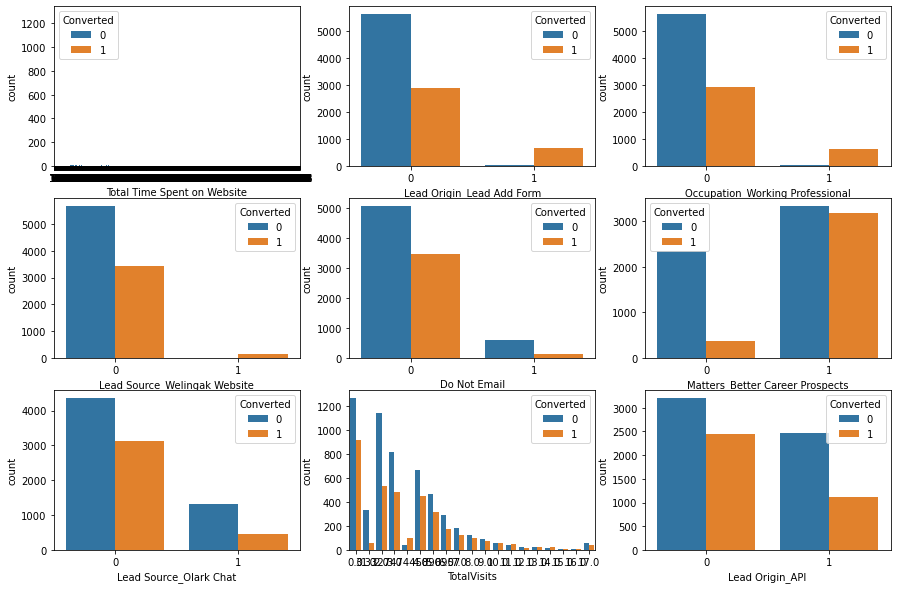

In [144]:
pred_col = ['Total Time Spent on Website','Lead Origin_Lead Add Form','Occupation_Working Professional',
            'Lead Source_Welingak Website','Do Not Email','Matters_Better Career Prospects','Lead Source_Olark Chat',
            'TotalVisits','Lead Origin_API' ]

plt.figure(figsize=(15,10))
for i in enumerate(pred_col):
    plt.subplot(3,3,i[0]+1)
    sns.countplot(x = i[1], hue = "Converted", data =df)
plt.show()